[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/HURU-School/HURUAI/blob/main/Lesson%202/01%20-%20Google%20Colaboratory%20Refresher.ipynb)


# Running Our First Model

In this class, we will flip some few things. We will train a neural network first, see the process involved. Then, later on we will dig into the details of how the model works. With this approach, some things might not be clear from the onset. It is Ok. We will fill in the blank spaces as we go. 
With deep learning, some parts of the code usually change to accomodate the variety of tasks we would like to accomplish, some parts of the code stay the same. I will break down the notebook into afew sections. Thatway, as we go, it will become quite apparent why we may alter some parts of the code to suit a particular task.

## MNIST Dataset
The MNIST dataset was built in the 80's to assist in organizing, sorting and batching of mails at the US Post office. It is a simple dataset of handwritten digits from 0-9. Our task is to read in an image containing a digit and tell what digit is in the image. This dataset
The images in the dataset are grayscale images of size 28 * 28 pixels in size. A sample of the images is shown in the figure below.
![MNIST](../images/Lesson_2/mnist_image.PNG)
The dataset forms a solid foundation to ANN programming, and specifically computer vision. Building a business model from a digit classifier might be a little too old now, but here is a list of amazing solutions that apply the same technology.
  * [GreenEye selective sprayer](https://www.youtube.com/watch?v=iCOuTemX_cc) - Agriculture
  * [Mashgin Self Checkout System](https://www.youtube.com/watch?v=oXDvMzptyyw) - Retail

### Setting Up Our Environment

#### Mounting Colab to Gdrive

In [1]:
#  Mounts Google Colab on Gdrive.
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

#### Move to Drive, Create a Working Directory and Move into it.

In [2]:
# Selects our Gdrive we just mounted above
%cd /content/gdrive/My Drive

# Create our working directory
%mkdir HuruAI

# Move into the working directory
%cd /HuruAI

[WinError 3] The system cannot find the path specified: '/content/gdrive/My Drive'
E:\Courses\DeepLearning\Huru\Lesson 2
[WinError 2] The system cannot find the file specified: '/HuruAI'
E:\Courses\DeepLearning\Huru\Lesson 2


#### Notebook Setup

In [3]:
# The code below sets us up with some nice formatting for our plots.

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
# Import the required packages

import numpy as np

import torch
from torchvision import datasets, transforms

from torch import nn, optim
import torch.nn.functional as F

import matplotlib.pyplot as plt

#### Define a plot funtion that takes an image and returns it's predicted Class.
This part is usually not included here. It can be written on a separate page and imported. But I will leave it here so that we do not have to deal with the complexities.

In [7]:
def image_preds(image, probs):
    ''' This function is for viewing an image and its predicted class.
    '''
    probs = probs.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), probs)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Returned Class Probabilities')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

### Preparing the Dataset

#### Downloading the Dataset.

In [8]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and transform the training dataset
trainset = datasets.MNIST('./Data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and transform the test dataset
testset = datasets.MNIST('./Data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

#### Prepare an Iterator
We prepare an iterator so that later on we can load the images with the corresponding label like
```python
for image, label in trainloader:
    ## What to do with the image and label.
```

In [9]:
train_iterator = iter(trainloader)
images, labels = train_iterator.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


Below is how a sample image looks like

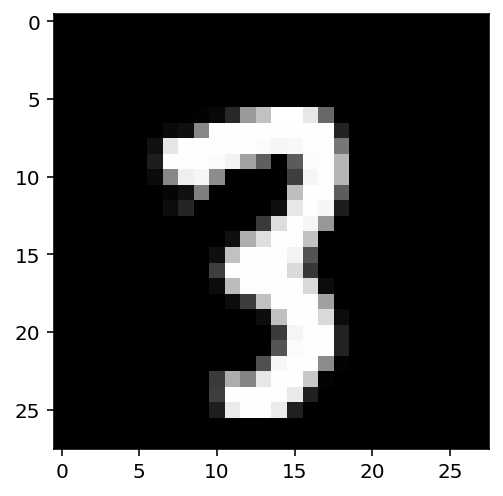

In [10]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

### Building the Network
Each image in our dataset is 28 * 28 pixels, which makes a total of 784 pixels. There are 10 classes in the dataset(0 - 9). We will be using ReLU activation which is almost always the standard for multiclass classification. More on this later. 

In [11]:
# Defining Our Network Architecture.

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        
        return x

### Training the Network.

#### Defining Our Model, Loss and Optimizer 

In [12]:
# Instantiate the Model, define the loss and optimizer

model = Net()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

#### Dry Run on the network before Training

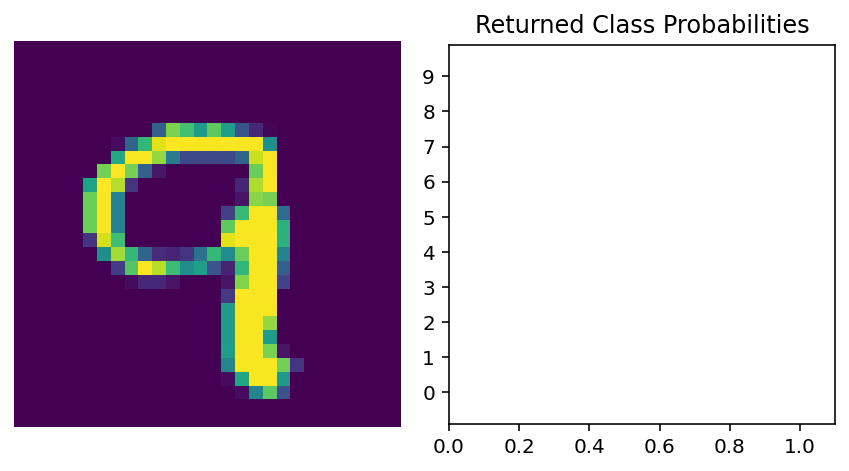

In [14]:
# Flatten the into a 1-D vector, new shape is (batch size, color channels, total image pixels) 

images.resize_(64, 1, 784)

# alternatively use the code below to automatically load the batch size
# images.resize_(images.shape[0], 1, 784)

# Make a forward pass through the network
image_index = 0
probs = model.forward(images[image_index,:])

image = images[image_index]
image_preds(image.view(1, 28, 28), probs)

#### Train the Network

In [15]:
# Training the Network

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        logits = model(images)
        loss = criterion(logits, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.32186905246402725
Training loss: 0.16205975061048195
Training loss: 0.1306296400437906
Training loss: 0.10958025162406107
Training loss: 0.10415856121306512


### Testing the Network

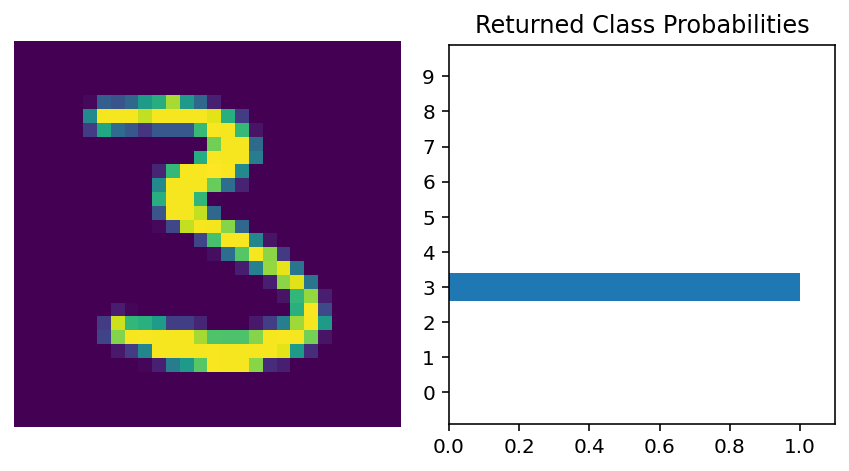

In [21]:
# Create an iterator for the test dataset
test_iterator = iter(testloader)
images, labels = test_iterator.next()
image = images[12]

# Test the network 
probs = torch.exp(model(image))

# Plot the image and class probabilities
image_preds(image, probs)

### Deployment